In [1]:
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
# データの読み込み
train_data = np.load("train_data.npy")
train_label = np.load("train_label.npy")
print(train_data.shape)
print(train_label.shape)

(3000, 1, 28, 28)
(3000, 15)


In [4]:
# ランダムスプリット
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, train_label,train_size=0.8)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 1, 28, 28)
(600, 1, 28, 28)
(2400, 15)
(600, 15)


In [5]:
X_train = (X_train - X_train.min()) / X_train.max()

In [6]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(2400, 28, 28, 1)

In [33]:
datagen = ImageDataGenerator(
           rotation_range=0.1,
           width_shift_range=0.2,
           height_shift_range=0.2,
           shear_range=0.2,
           zoom_range=0.1,
           horizontal_flip=False,
           vertical_flip=False)

In [70]:
# gen
X_gen = datagen.flow(X_train, y_train, batch_size=2400)
X_train_new1 = X_train.copy()
y_train_new1 = y_train.copy()

add_cnt = 10
for i in range(add_cnt):
    X_gen_new1, y_gen_new1 = X_gen.__next__()
    X_train_new1 = np.concatenate([X_train_new1, X_gen_new])
    y_train_new1 = np.concatenate([y_train_new1, y_gen_new])

In [71]:
print(X_train_new1.shape, y_train_new1.shape)

(26400, 28, 28, 1) (26400, 15)


In [72]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(600, 28, 28, 1)

In [73]:
datagen2 = ImageDataGenerator(
           rotation_range=0.1,
           width_shift_range=0.1,
           height_shift_range=0.1,
           shear_range=0.1,
           zoom_range=0.1,
           horizontal_flip=False,
           vertical_flip=False)

In [74]:
X_gen2 = datagen2.flow(X_train, y_train, batch_size=2400)
X_train_new2 = X_train.copy()
y_train_new2 = y_train.copy()

add_cnt = 10
for i in range(add_cnt):
    X_gen_new2, y_gen_new2 = X_gen.__next__()
    X_train_new2 = np.concatenate([X_train_new2, X_gen_new2])
    y_train_new2 = np.concatenate([y_train_new2, y_gen_new2])

In [76]:
X_train_new = np.concatenate([X_train_new1, X_train_new1])
y_train_new = np.concatenate([y_train_new1, y_train_new1])
print(X_train_new.shape, y_train_new.shape)

(52800, 28, 28, 1) (52800, 15)


In [77]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping

In [78]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.1))


model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28,1)))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(15, activation='softmax'))

In [80]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [89]:
history = model.fit(X_train_new, y_train_new,
                    batch_size= 32,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 52800 samples, validate on 600 samples
Epoch 1/5
52800/52800 [==============================] - 68s 1ms/step - loss: 2.8319 - acc: 0.8242 - val_loss: 1.9073 - val_acc: 0.8817
Epoch 2/5
52800/52800 [==============================] - 67s 1ms/step - loss: 2.5195 - acc: 0.8436 - val_loss: 1.9073 - val_acc: 0.8817
Epoch 3/5
52800/52800 [==============================] - 69s 1ms/step - loss: 2.6450 - acc: 0.8358 - val_loss: 1.3163 - val_acc: 0.9183
Epoch 4/5
52800/52800 [==============================] - 67s 1ms/step - loss: 2.7560 - acc: 0.8289 - val_loss: 4.1101 - val_acc: 0.7450
Epoch 5/5
52800/52800 [==============================] - 65s 1ms/step - loss: 2.2609 - acc: 0.8596 - val_loss: 0.9402 - val_acc: 0.9417


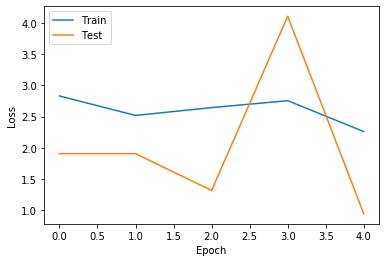

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [41]:
model.save('katakana_model.h5')